In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
(a,A),(b,B)=tf.keras.datasets.fashion_mnist.load_data()

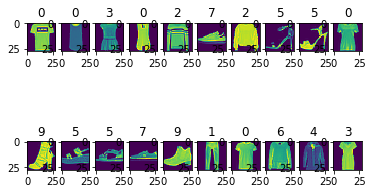

In [15]:
for i in range(1,21):
    plt.subplot(2,10,i)
    plt.imshow(a[i])
    plt.title(A[i])

In [16]:
a.shape

(60000, 28, 28)

In [158]:
model_jmda=tf.keras.Sequential()

In [159]:
model_jmda.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [160]:
model_jmda.add(tf.keras.layers.Dense(64,activation='selu'))
model_jmda.add(tf.keras.layers.AlphaDropout(0.2))
model_jmda.add(tf.keras.layers.Dense(64,activation='selu'))
model_jmda.add(tf.keras.layers.AlphaDropout(0.2))
model_jmda.add(tf.keras.layers.Dense(64,activation='selu'))
model_jmda.add(tf.keras.layers.AlphaDropout(0.2))
model_jmda.add(tf.keras.layers.Dense(64,activation='selu'))
model_jmda.add(tf.keras.layers.AlphaDropout(0.2))
model_jmda.add(tf.keras.layers.Dense(64,activation='selu'))
model_jmda.add(tf.keras.layers.AlphaDropout(0.2))

In [161]:
model_jmda.add(tf.keras.layers.Dense(10,activation='softmax'))

In [162]:
model_jmda.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)                50240     
_________________________________________________________________
alpha_dropout_20 (AlphaDropo (None, 64)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 64)                4160      
_________________________________________________________________
alpha_dropout_21 (AlphaDropo (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                4160      
_________________________________________________________________
alpha_dropout_22 (AlphaDropo (None, 64)              

In [163]:
model_jmda.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [164]:
model_jmda.fit(a,A,epochs=50,validation_data=(b,B))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 87us/sample - loss: 1.1376 - sparse_categorical_accuracy: 0.6143 - val_loss: 1.3291 - val_sparse_categorical_accuracy: 0.7271
Epoch 2/50
60000/60000 [==============================] - 4s 70us/sample - loss: 0.7292 - sparse_categorical_accuracy: 0.7150 - val_loss: 1.3627 - val_sparse_categorical_accuracy: 0.7297
Epoch 3/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.6908 - sparse_categorical_accuracy: 0.7305 - val_loss: 1.1332 - val_sparse_categorical_accuracy: 0.7549
Epoch 4/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.6765 - sparse_categorical_accuracy: 0.7400 - val_loss: 1.2246 - val_sparse_categorical_accuracy: 0.7529
Epoch 5/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.6574 - sparse_categorical_accuracy: 0.7510 - val_loss: 1.1063 - val_sparse_categorical_accuracy: 0.7780
Epoch 6/50
6000

60000/60000 [==============================] - 4s 69us/sample - loss: 0.6019 - sparse_categorical_accuracy: 0.8400 - val_loss: 1.4002 - val_sparse_categorical_accuracy: 0.8521
Epoch 45/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.6102 - sparse_categorical_accuracy: 0.8392 - val_loss: 1.3137 - val_sparse_categorical_accuracy: 0.8434
Epoch 46/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.6163 - sparse_categorical_accuracy: 0.8372 - val_loss: 1.4369 - val_sparse_categorical_accuracy: 0.8508
Epoch 47/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.6027 - sparse_categorical_accuracy: 0.8385 - val_loss: 1.7500 - val_sparse_categorical_accuracy: 0.8493
Epoch 48/50
60000/60000 [==============================] - 4s 70us/sample - loss: 0.6227 - sparse_categorical_accuracy: 0.8384 - val_loss: 1.3824 - val_sparse_categorical_accuracy: 0.8513
Epoch 49/50
60000/60000 [==============================] - 4s 69us/sampl

In [165]:
k=pd.Series(model_jmda.history.history.keys())
v=pd.Series(model_jmda.history.history.values())
v=pd.DataFrame(data=v[0])
values=np.array(v.values).T
history_jmda=pd.DataFrame(data=values,columns=k[0])

(0.3, 1)

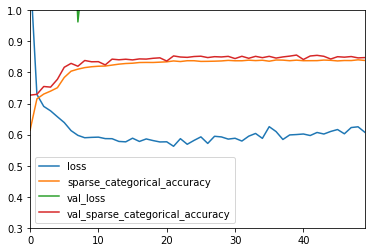

In [166]:
history_jmda.plot()
plt.ylim(0.3,1)

In [167]:
answer=model_jmda.predict(b[:10])

In [168]:
for i in range(len(answer)):
    print('預測值:{},實際值:{}'.format(np.argmax(answer[i]),B[i]))

預測值:9,實際值:9
預測值:2,實際值:2
預測值:1,實際值:1
預測值:1,實際值:1
預測值:6,實際值:6
預測值:1,實際值:1
預測值:4,實際值:4
預測值:6,實際值:6
預測值:5,實際值:5
預測值:7,實際值:7
